# Завдання
1. Використовуючи датасет `train.csv`, побудувати діаграму розподілу змінної `Age`.
2. Заповнити пропущені значення.
3. Обґрунтувати вибір способу заповнення пропущених значень.

## Рішення

### 1. Побудова діаграми

In [250]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [251]:
# Завантаження датасету
data = pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


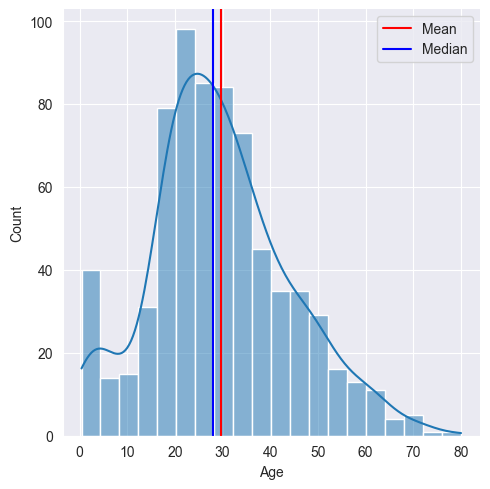

In [252]:
# Розподіл змінної 'Age'
sns.displot(data, x='Age', kde=True)
plt.axvline(x=data.Age.mean(), color='red', label='Mean')
plt.axvline(x=data.Age.median(), color='blue', label='Median')
plt.legend(loc = 'upper right')

### 2. Заповнити пропущені значення.
#### 2.1 Заповнення пропущених значень по групах

In [253]:
# Заповнення пропущених значень медіаною значенням
data['Age_Fill_Median'] = data.groupby(['Pclass', 'Sex'], group_keys=False)['Age'].apply(lambda x: x.fillna(x.median()))
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Fill_Median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,21.5
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0


#### 2.2 Заповнення пропущених значень по за допомогою Random Forest

In [254]:
# Копія датасету
data_rf = data.copy()[['Age', 'Pclass', 'Sex']]

# Заміна значень
data_rf.Sex = data_rf.Sex.map({'male': 1, 'female': 0})

# Розбиття вибірки на навчальну (відомий вік) і тестову (невідомий вік)
train = data_rf.loc[(data_rf.Age.notnull())]
test = data_rf.loc[(data_rf.Age.isnull())]

# Відбір змінних
y = train.values[:, 0]
X = train.values[:, [1, 2]]

# RF модель
rfr = RandomForestRegressor(n_estimators=3000, n_jobs=-1)
rfr.fit(X, y)

# Прогноз
predicted_ages = rfr.predict(test.values[:, [1, 2]])

# Формування змінної
data['Pred_Age'] = data.Age

# Заповнення змінної
data.loc[(data.Pred_Age.isnull()), 'Pred_Age'] = predicted_ages.astype(int)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Fill_Median,Pred_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.0,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.0,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,21.5,21.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.0,26.0


### 3. Обґрунтувати вибір способу заповнення пропущених значень.

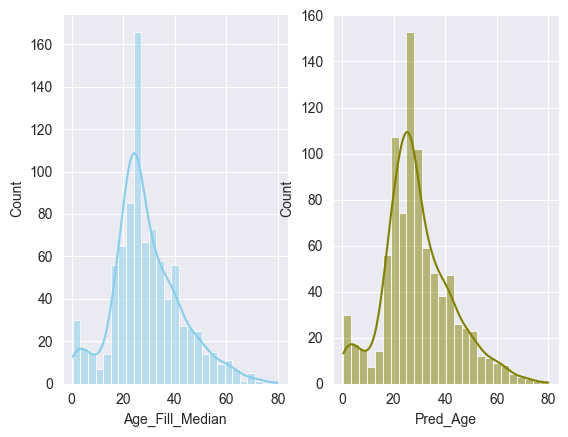

In [255]:
# Розподіл змінних 'Age_Fill_Median' та 'Pred_Age'.
fig, axs = plt.subplots(1, 2)
sns.histplot(data=data, x="Age_Fill_Median", color="skyblue", kde=True, ax=axs[0])
sns.histplot(data=data, x="Pred_Age", color="olive", kde=True, ax=axs[1])
plt.show()

Розглянуто два підходи:
1. У першому випадку ми заповнили пропуски медіанними значеннями відповідної групи спостережень. Медіана в такому випадку підходить краще середнього, оскільки у даних є асиметрія.
2. Другий підхід з використанням моделі Random Forest. Ми використали наявну інформацію про пасажирів для отримання знань про пропущені значення.
3. Оцінити ефективність кожного підходу можна подальшим дослідженням і прогнозуванням показника `Survived`.